In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from partition import *
from synthetic import *
from kkmeans import *

# Overview

This notebook provides a pythonic translation of the kernel methods for clustering presented in STAT's 671 slide deck. It provides a very cursory writeup of the theory and equations, showing code of how to implement it efficiently.

## $K$-means Clustering

First, let us observe conventional $k$-means. Given data points $\mathcal D = \{ \mathbf x_1, ..., \mathbf x_n \in \mathbb R^b, 1 \le i \le n \}$, minimize the following cost functions

\begin{equation}
 \operatorname*{min}_{\mu_j \in \mathbb R^p} \sum_{i=1}^{n} \left|\left| x_i - \mu_{s_i}\right|\right|_2^2
\end{equation}

$K$-means acheives this doing

\begin{equation}
\Leftrightarrow \forall j, \quad \mu_{j}=\frac{1}{\left|C_{j}\right|} \sum_{i \in C_{j}} x_{i} \quad \text { with } \quad C_{j}=\left\{i: s_{i}=j\right\}
\end{equation}

This can be converted to kernel $K$-means using little modification. Instead, consider $x_1, ..., x_n \in \mathcal X$ and consider the RKHS $\mathcal H$ with the PD kernel $K: \mathcal X \times \mathcal X \rightarrow \mathbb R$, such that the new objective becomes

\begin{equation}
\operatorname*{min}_{\mu_j \in \mathcal H} \sum_{i=1}^{n} \left| \left| \varphi (x_i) - \mu_{s_i} \right|\right| _{\mathcal H}^2
\end{equation}

## Generating Synthetic Data



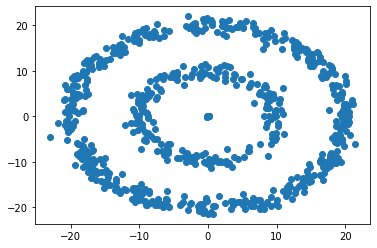

In [10]:
X = np.vstack((generate_ring_2d(20, sigma=0.1), generate_ring_2d(200, 10, 1), generate_ring_2d(500, 20, 1)))
plt.figure()
plt.scatter(*X.T)
plt.show()

In [13]:
Y = kernalized_kmeans(X, 3, lambda x,y: k_gaussian(x, y, 1))

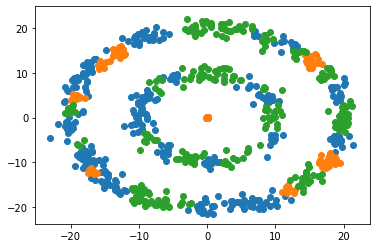

In [14]:
plt.figure()
plt.scatter(*X[Y==0,:].T)
plt.scatter(*X[Y==1,:].T)
plt.scatter(*X[Y==2,:].T)
plt.show()

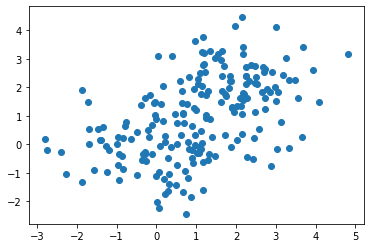

In [5]:
X = np.vstack((generate_cluster_2d(100), generate_cluster_2d(100, pos=[2, 2])))
plt.figure()
plt.scatter(*X.T)
plt.show()

In [8]:
Y = kernalized_kmeans(X, 2, lambda x,y: k_polynomial(x, y, 2))

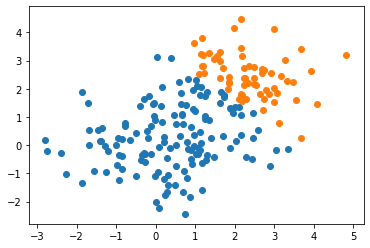

In [9]:
plt.figure()
plt.scatter(*X[Y==0,:].T)
plt.scatter(*X[Y==1,:].T)
plt.show()

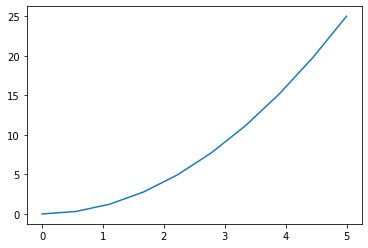

In [5]:
x = np.linspace(0, 5, 10)
plt.figure()
plt.plot(x, x**2)
plt.show()

Using the functional

\begin{equation}
J(f) =\operatorname*{arg min}_{x} \sum_{i=1}^{n} ||f(x_i) - y||_2^2 + \lambda ||f||_{\mathcal H}^2
\end{equation}

The Wiener-Khinchin theorem

\begin{equation}
r_{x x}(\tau)=\int_{-\infty}^{\infty} e^{2 \pi i \tau f} d F(f)
\end{equation}